Author: Hari Kumar<br>
Created Date: 10/17/2022

*These Project helps in detectin of pothholes or anomoulies in the road.Through the machine learning image classification.

Approach

In india there are serveral accidents due to pothholes and road anomolies.These difficult to Report about the potholes or assess it without a manual survey.So to solve these issue we will be training a model that detects cracks and potholes on the roads.
The images collected are by using drones and also can be sent by people to a server with location specification so as to.The Large scale images are reduced and processed accordingly using image Features.

There will be two main data sets.One is Pothole and other is not_pothole.We will introduce the non_pothole and pothole images as 85 %training dataset and later we will use rest 15% for evaluation the model.
And Once the model is deployed the people can upload the images which will increase the Precision.

## The Data

As of now to train and evaluate the model we will using the data from a paper by 
L. Zhang, F. Yang, Y. Daniel Zhang and Y. J. Zhu, "Road crack detection using
deep convolutional neural network," 2016 IEEE International Conference on Image Processing (ICIP), Phoenix, AZ, 2016, pp. 3708-3712,  doi: 10.1109/ICIP.2016.7533052.

Source can be downloaded at: 
https://data.mendeley.com/datasets/5y9wdsg2zt/2\

## Imports

All the Neccessary Imports.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import glob
import pandas as pd
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from PIL import Image
from sklearn.calibration import calibration_curve
import os, requests, zipfile
!pip install GitPython
from git import Repo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 24.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 


Data Set Contains Three Directories:


1. Train/
   a. Crack
   b. normal
2. Test/
   a. Crack
   b.normal

The downloaded dat will be stored on the in source directory. As temp_concrete_crack

Each batch will have 32 Pics
And Photo Dimensions will be 227 * 277 Px

As of Now we will be using dataset of https://github.com/Hari-maloth/Road-Crack-Detection.git

In [4]:
batch_size = 32
photo_height = 227
photo_width = 227

filepath = 'road_cracks'

try:
    Repo.clone_from('https://github.com/Hari-maloth/Road-Crack-Detection.git', filepath)
except:
    pass

#AUTOTUNE = tf.d

#train = train.cache().prefetch(buffer_size=AUTOTUNE)
#val = val.cache().prefetch(buffer_size=AUTOTUNE)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'.//19zXMYykgGCR48I5_hw8A5qRP_885nU6k'

In [ ]:
#Assaining file paths.
train_path = r'{road_cracks}/dataset/train/'.format(road_cracks=filepath)
test_path = r'{road_cracks}/dataset/test'.format(troad_cracks=filepath)


In [ ]:
#Training dataset with train_path(Pre Processing).
train = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=None,
  subset=None,
  seed=42,
  image_size=(photo_height, photo_width),
  batch_size=batch_size)

Found 28000 files belonging to 2 classes.


In [ ]:
#Validation

val = tf.keras.preprocessing.image_dataset_from_directory(
  val_path,
  validation_split=None,
  subset=None,
  seed=42,
  image_size=(photo_height, photo_width),
  batch_size=batch_size)


Found 8000 files belonging to 2 classes.


In [ ]:
#Assaining Classes Names for datasets.
classes = train.class_names
print('classes: ' +str(classes))


classes: ['crack', 'no_crack']


#Preview of Data sets.

In [ ]:
#Number of Pics You want Visulasize
a=int(input())
#Size of the Pic You want to Visualize
b=int(input())
if b>=32:
  print('Please Rerun this cell Also Enter B Value Below 32')

13
16


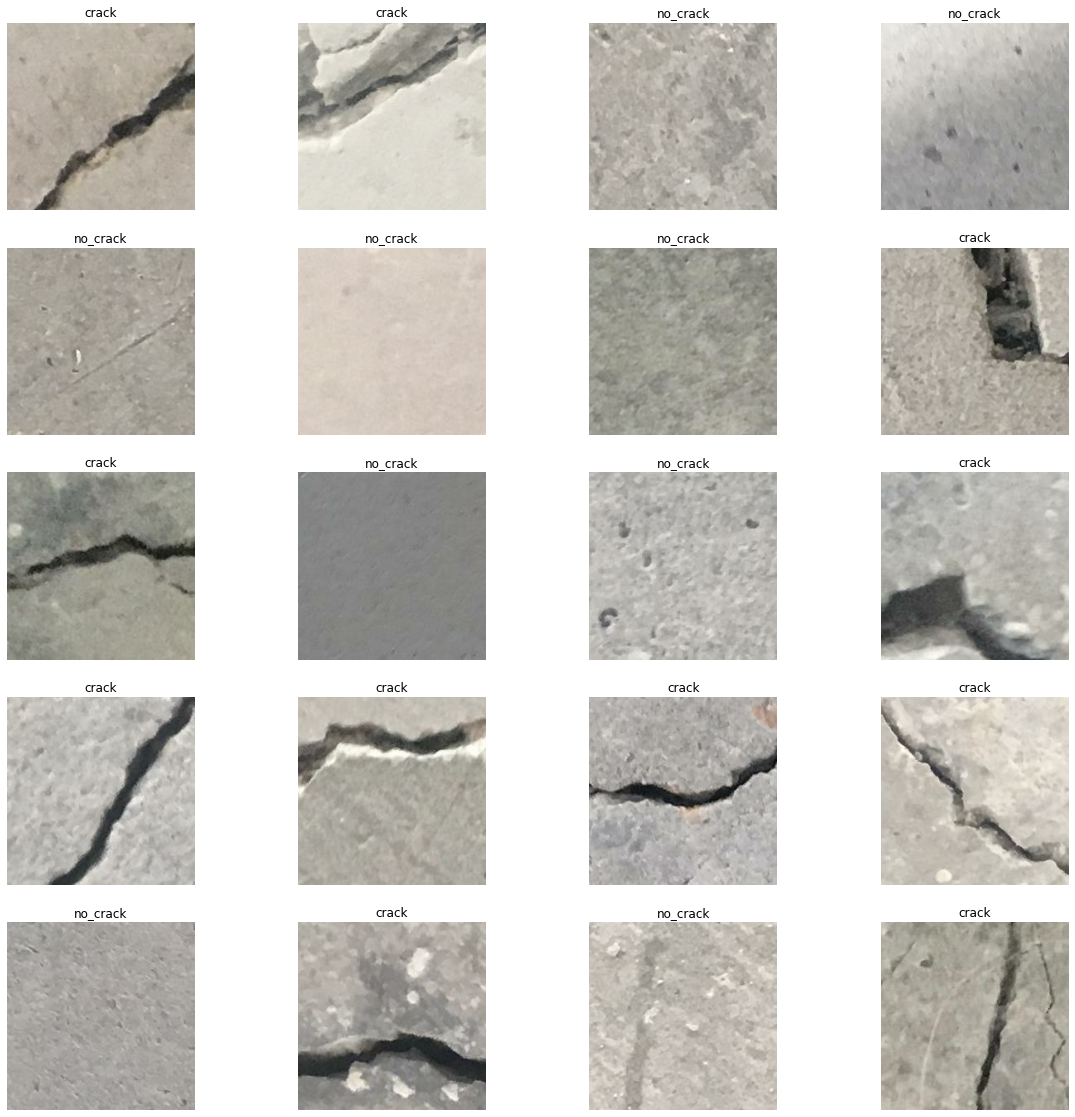

In [ ]:
plt.figure(figsize=(b, b))
for images, labels in train.take(1):
  for i in range(a):
    ax = plt.subplot((a/4), 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")
    
plt.show()

In [ ]:
tf.keras.backend.clear_session()

#There are two classes One is Crack Other not_Crack
num_classes = 2




#There will a preprocessing layer first it scale all the images in data set to a size of 255 px 
#After that there will be there relu activation layers
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
    
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

print('compiled!')

compiled!


Epoch 1/30
874/875 [============================>.] - ETA: 0s - loss: 0.1249 - accuracy: 0.9531

875/875 [==============================] - 59s 56ms/step - loss: 0.1248 - accuracy: 0.9531 - val_loss: 0.0537 - val_accuracy: 0.9822
Epoch 2/30
875/875 [==============================] - ETA: 0s - loss: 0.0586 - accuracy: 0.9817

875/875 [==============================] - 48s 54ms/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0408 - val_accuracy: 0.9855
Epoch 3/30
874/875 [============================>.] - ETA: 0s - loss: 0.0659 - accuracy: 0.9813

875/875 [==============================] - 47s 54ms/step - loss: 0.0658 - accuracy: 0.9813 - val_loss: 0.0371 - val_accuracy: 0.9875
Epoch 4/30
875/875 [==============================] - 47s 53ms/step - loss: 0.0327 - accuracy: 0.9917 - val_loss: 0.1792 - val_accuracy: 0.9375
Epoch 5/30
875/875 [==============================] - 47s 53ms/step - loss: 0.0348 - accuracy: 0.9899 - val_loss: 0.0500 - val_accuracy: 0.9834
Epoch 6/30
874/875 [============================>.] - ETA: 0s - loss: 0.0376 - accuracy: 0.9907

875/875 [==============================] - 47s 53ms/step - loss: 0.0376 - accuracy: 0.9907 - val_loss: 0.0231 - val_accuracy: 0.9924
Epoch 7/30
875/875 [==============================] - 46s 53ms/step - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.0335 - val_accuracy: 0.9919
Epoch 8/30
875/875 [==============================] - 47s 53ms/step - loss: 0.0172 - accuracy: 0.9951 - val_loss: 0.0360 - val_accuracy: 0.9877
Epoch 9/30
875/875 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9960

875/875 [==============================] - 47s 53ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0182 - val_accuracy: 0.9940
Epoch 10/30
875/875 [==============================] - 46s 52ms/step - loss: 0.0180 - accuracy: 0.9951 - val_loss: 0.0227 - val_accuracy: 0.9931
Epoch 11/30
874/875 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9968

875/875 [==============================] - 48s 54ms/step - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.0170 - val_accuracy: 0.9951
Epoch 12/30
875/875 [==============================] - 46s 52ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0412 - val_accuracy: 0.9887
Epoch 13/30
875/875 [==============================] - 46s 52ms/step - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.0227 - val_accuracy: 0.9935
Epoch 14/30
875/875 [==============================] - 47s 53ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0253 - val_accuracy: 0.9930


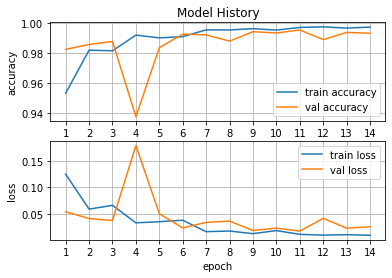

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

#We will have 20 epochs for the dataset.
history = model.fit(
  train,
  validation_data=val,
  epochs=20,
    callbacks=[model_checkpoint, early_stopping]
)


h = pd.DataFrame(history.history)
h['epoch'] = h.index + 1

#This is not necessary in the model for as notebook to understand and visualize the data set we will matplolib graphs
plt.subplot(2, 1, 1)
plt.plot(h['epoch'], h['accuracy'], h['epoch'], h['val_accuracy'])
plt.title('Model History')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend(('train accuracy', 'val accuracy'),
           loc='lower right')
ax1 = plt.gca()
ax1.set_xticks(range(1, max(h['epoch'])+1))


plt.subplot(2, 1, 2)
plt.plot(h['epoch'], h['loss'], h['epoch'], h['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend(('train loss', 'val loss'),
           loc='upper right')
ax2 = plt.gca()
ax2.set_xticks(range(1, max(h['epoch'])+1))

plt.show()

#model.save('temp_concrete_crack')

loaded_model = tf.keras.models.load_model(filepath)

## Make Predictions

The following cell pulls all of the test photos, converts them to arrays, gets a prediction for them, and appends the results from each photo in a dataframe. You can use the import method from above as well, but it can be a bit difficult to get the results a useful format.  

In [ ]:
results = pd.DataFrame(columns=['predicted', 'actual', 'probability', 'file', 'raw_logits'])

at = 0
#Giving filepaths to labels .
# For Validation Image Set with 4000 Images are used along with labels.
for label in classes: 
    path = test_path+'/'+label
    print(path)
    for file in glob.iglob(path + '/*'):
        img = keras.preprocessing.image.load_img(
        file, target_size=(photo_height, photo_width)
        )
        
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        
        predictions = loaded_model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        results = results.append({'predicted': classes[np.argmax(score)], 'actual': label, 
                                  'probability': 100 * np.max(score), 'file': file,
                                 'raw_logits': score}, ignore_index=True)
        at +=1
        if at % 200 == 0:
            print(str(round(((at / 4000) * 100), 1))+'%')

        

score = accuracy_score(results['actual'], results['predicted'])
print('Test Accuracy : '+str(score))

temp_concrete_crack/data/concrete_images/test/crack
1/1 [==============================] - 0s 20ms/step
5.0%
1/1 [==============================] - 0s 17ms/step
10.0%
1/1 [==============================] - 0s 15ms/step
15.0%
1/1 [==============================] - 0s 19ms/step
20.0%
1/1 [==============================] - 0s 19ms/step
25.0%
1/1 [==============================] - 0s 15ms/step
30.0%
1/1 [==============================] - 0s 20ms/step
35.0%
1/1 [==============================] - 0s 16ms/step
40.0%
1/1 [==============================] - 0s 17ms/step
45.0%
1/1 [==============================] - 0s 18ms/step
50.0%
temp_concrete_crack/data/concrete_images/test/no_crack
1/1 [==============================] - 0s 18ms/step
55.0%
1/1 [==============================] - 0s 17ms/step
60.0%
1/1 [==============================] - 0s 24ms/step
65.0%
1/1 [==============================] - 0s 18ms/step
70.0%
1/1 [==============================] - 0s 20ms/step
75.0%
1/1 [===================

## Incorect Predictions
We have got accuarcy over 99 percent so the errors in prediction are little.But it is Necessary to Understand why did it happen.
So lets visualize the Data set of images that got Wrong prediction while the model is processing .

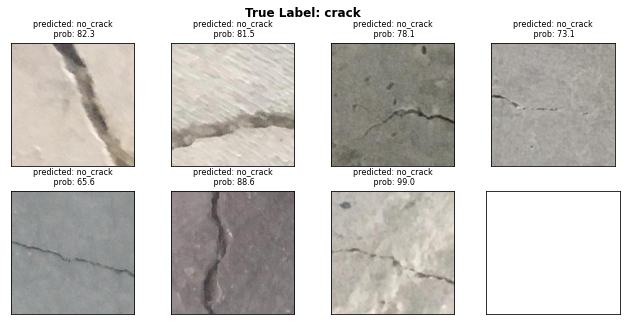

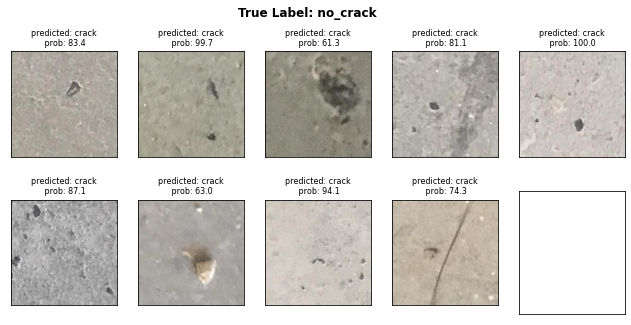

In [ ]:
for i in classes:
  #Incorrect Predictions is Class name not matching with label.
   mistakes = results.loc[(results['predicted'] != i) & (results['actual'] == i)]
   files = mistakes['file'].tail(10).values
   fig,ax = plt.subplots(2,int(len(files) / 2) + (int(len(files) % 2 > 0)))
   fig.set_size_inches(11, 5)
   prob = mistakes['probability'].tail(10).values
   act = mistakes['actual'].tail(10).values
   pred = mistakes['predicted'].tail(10).values
   fig.suptitle('True Label: '+str(i) + '\n' + ' ', weight='bold')
   #We will Visualize the code with the matplotlib
   for i in range(0, len(files)):
       with open(files[i],'rb') as f:
           image=Image.open(f)
           ax[i%2][i//2].imshow(image)
   ax_list = fig.axes
   for ax in range(len(files)):

      ax_list[ax].set_title('predicted: '+pred[ax]+ "\n" + ' prob: '+str(round(prob[ax], 1)), fontsize=8)
   for ax in range(len(ax_list)):
      ax_list[ax].set_xticks([])
      ax_list[ax].set_yticks([])
plt.show()

We can see that non clear and blur images got less probability of cracks mostly. And also when image disturbance is Big.

Lets Take a look probability distribution for incorrect classifications

We will Use Pandas to Understand the errors in the model.

In [ ]:

pd.set_option('precision', 1)
print('Number of images model have error : '+str(len(errors)))
print('Probability Of False positive mean: '+str(np.mean(errors['probability'].loc[(results['predicted'] != 'no_crack')])))
print('Probability Of False negative mean : '+str(np.mean(errors['probability'].loc[(results['predicted'] == 'no_crack')])))



Number of images model have error : 16
Probability Of False positive mean: 82.65917433632745
Probability Of False negative mean : 81.17626479693821


Out of 4000 images that are used for processing only 14 got wrong prediction.But you can also see the wrong mean for both Probability Of False positive mean and False Negative mean around 81 % . So model was confident but it was wrong.

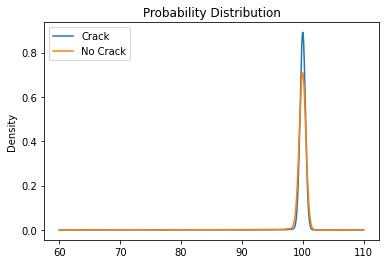

In [ ]:
crack = results.loc[(results['predicted'] == 'crack')]
no_crack = results.loc[(results['predicted'] == 'no_crack')]
probs = pd.DataFrame({'Crack': crack['probability'], 'No Crack': no_crack['probability']})

ax = probs.plot.kde(ind=[i for i in np.linspace(start = 60, stop = 110, num = 1000)], 
                    title='Probability Distribution', xlabel='Probability')

We can see model is more accurate for most images for crack.

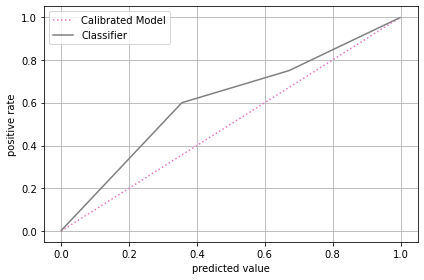

In [ ]:
prob_no_crack = []
for i in range(len(results)):
    logits = results['raw_logits'][i]
    prob_no_crack.append(logits[1])

prob_true_binary, prob_pred_binary = calibration_curve(
        results['actual'].map({'crack': 0, 'no_crack': 1}), 
        prob_no_crack, n_bins=4, normalize=False)

#We will use matplotlib to visualize the graph.
fig = plt.figure()
ax = plt.gca()

plt.plot([0, 1], [0, 1], color='tab:pink', linestyle=":", label="Calibrated Model")
plt.plot(prob_pred_binary, prob_true_binary, label='Classifier', color="tab:grey")

plt.ylabel('positive rate')
plt.xlabel('predicted value')

plt.legend()
plt.yticks()
plt.grid(True)
plt.tight_layout()

plt.show()

Calibrated model performs better than classifier model.And its variance between variable is 1.Which means it is good.

This Last line will remove downloaded data so Please Enter after all the evaluations are done

In [ ]:
# delete all files downloaded in this notebook
import datetime
from git import rmtree
print('Type Yes or Y or y or yes to delete the downloaded resources')
user=input()
if user=="Yes" or user=='yes' or user=='y' or user=="Y":
  print('The downloaded resource files are deleted.Deletion intiated at '+str(datetime.datetime.now())+" UTC Time     Thank You for Presence.")
  rmtree('./'+filepath)
  print('The downloaded resource files are deleted.At '+str(time())+"Thank You for Presence.")
else:
    print("Waiting for input to Delete.If you want to delete the downloaded resources input y or Yes or yes or Y")



Type Yes or Y or y or yes to delete the downloaded resources
Yes
The downloaded resource files are deleted.Deletion intiated at 2022-10-17 18:34:28.479152 UTC Time     Thank You for Presence.


FileNotFoundError: ignored

#Arguments


The model Generated will help classifing cracks with no cracks.Similar model can introduced for pothole and no pothole as well.There are several limations with computer vision problem such as image should be clear and model should be trained with clear images.